In [1]:
import pandas as pd
from tqdm import tqdm_notebook, tqdm
tqdm.pandas()

In [3]:
df_train = pd.read_csv('/Users/cenk/data-sets/shopee/shopee-product-matching/train.csv')
df_train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [4]:
df_products = df_train.groupby(['label_group']).agg(['count'])
df_products.head()

,posting_id,image,image_phash,title
,count,count,count,count
label_group,,,,
258047,3,3,3,3
297977,2,2,2,2
645628,12,12,12,12
801176,2,2,2,2
887886,2,2,2,2


<AxesSubplot:>

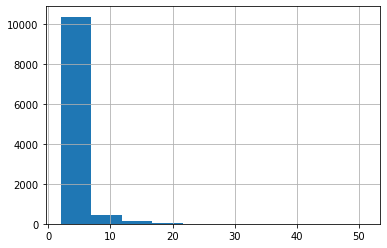

In [5]:
df_products[('title', 'count')].hist(bins=10)

In [6]:
df_products[('title', 'count')].describe()

count    11014.000000
mean         3.109679
std          2.940827
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         51.000000
Name: (title, count), dtype: float64

In [7]:
len(df_products)

11014

In [8]:
len(df_products.loc[df_products[('title', 'count')] >= 3])

4035

In [9]:
len(df_train)

34250

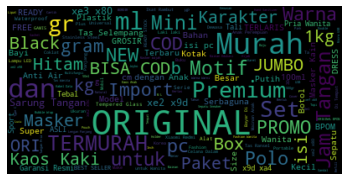

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = '\n'.join(df_train.title.values)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
df_train.title.sample(5)

18275    SYB BODY SCRUB BIBIT PEMUTIH BIBIT PEMUTIH BOD...
621      Lampu hias led modul smd 5050 waterproof 6 led...
18386              Willsen Ninio F-338 Training Cup 3 in 1
10210    ERTOS Teethgenic Tooth Whitening Cream / Pemut...
17234    [SUPER MURAH] Termurah Rak Piring Stainless Mi...
Name: title, dtype: object

100%|██████████| 34250/34250 [00:00<00:00, 921443.68it/s]


<AxesSubplot:>

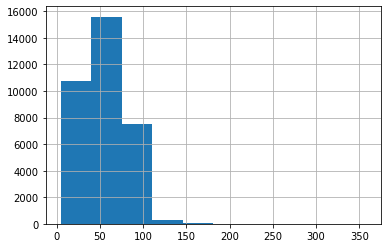

In [19]:
df_train['char_length'] = df_train.title.progress_apply(len)
df_train.char_length.hist(bins=10)

In [20]:
def unique_token_ration(title:str):
    tokens = title.lower()
    tokens = title.split(' ')
    return float(len(set(tokens))) / float(len(tokens))
unique_token_ration(df_train.sample(1).title.values[0])

1.0

100%|██████████| 34250/34250 [00:00<00:00, 361294.21it/s]


<AxesSubplot:>

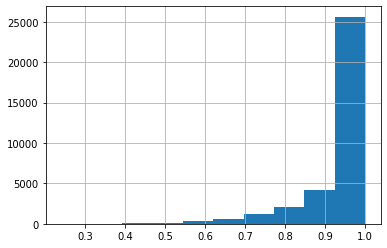

In [21]:
df_train['unique_token_ratio'] = df_train.title.progress_apply(unique_token_ration)
df_train.unique_token_ratio.hist(bins=10)

In [22]:
df_train.unique_token_ratio.describe()

count    34250.000000
mean         0.951238
std          0.093510
min          0.239130
25%          0.923077
50%          1.000000
75%          1.000000
max          1.000000
Name: unique_token_ratio, dtype: float64

In [24]:
df_train.sort_values(by='unique_token_ratio').head().title.values

array(['OliveShop \\xe2\\x9d\\xa4 Total Repair TR 5 Shampoo 650ml                                   Loreal TR Hair Shampoo',
       '[PROMO] MASKER SCUBA PREMIUM / MASKER KAIN / MASKER SCUBA / MASKER KAIN SCUBA / MASKER / MASKER KAIN',
       'JILBAB ANAK ELMO  / JILBAB ANAK BAYI / HIJAB ANAK / JILBAB ANAK ANAK  / JILBAB ANAK / JILBAB BAYI',
       'KARTU UNO / UNO CARD / UNO / KARTU UNO MURAH / MAINAN KARTU / UNO CARDS / KARTU MAINAN',
       'Rubik 3x3 - GAN RS 3x3 - GAN356 RS - GAN 356 RS Stickerless - GAN 3x3 RS - GAN 356 RS'],
      dtype=object)

In [25]:
len(df_train.loc[df_train.unique_token_ratio > .8])

31095